In [1]:
from keras import layers, models

Using TensorFlow backend.


In [2]:
def ANN_models_func(Nin, Nh, Nout):
    x = layers.Input(shape=(Nin,))
    h = layers.Activation('relu')(layers.Dense(Nh)(x))
    y = layers.Activation('softmax')(layers.Dense(Nout)(h))
    model = models.Model(x, y)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print('ANN_models_func')
    model.summary()
    return model

In [3]:
def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print('ANN_seq_func')
    model.summary()
    return model

In [4]:
class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        x = layers.Input(shape=(Nin,))
        h = layers.Activation('relu')(layers.Dense(Nh)(x))
        y = layers.Activation('softmax')(layers.Dense(Nout)(h))
        super().__init__(x, y)
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        print('ANN_models_class')
        self.summary()

In [5]:
class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        print('ANN_seq_class')
        self.summary()

In [6]:
import numpy as np
from keras import datasets
from keras.utils import np_utils

In [7]:
def Data_func():
    (X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()
    
    Y_train = np_utils.to_categorical(Y_train)
    Y_test = np_utils.to_categorical(Y_test)
    
    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W*H)
    X_test = X_test.reshape(-1, W*H)
    
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    return (X_train, Y_train), (X_test, Y_test)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

In [10]:
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

In [11]:
def main_model_func():
    Nin = 784
    Nh = 100
    number_of_class = 10
    Nout = number_of_class
    
    model = ANN_models_func(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()
    
    history = model.fit(X_train, Y_train, epochs=15, batch_size=100, validation_split=0.2)
    performance_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Accuracy : ', performance_test)
    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()


In [12]:
def main_seq_func():
    Nin = 784
    Nh = 100
    number_of_class = 10
    Nout = number_of_class
    
    model = ANN_seq_func(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()
    
    history = model.fit(X_train, Y_train, epochs=15, batch_size=100, validation_split=0.2)
    performance_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Accuracy : ', performance_test)
    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()


In [13]:
def main_model_class():
    Nin = 784
    Nh = 100
    number_of_class = 10
    Nout = number_of_class
    
    model = ANN_models_class(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()
    
    history = model.fit(X_train, Y_train, epochs=15, batch_size=100, validation_split=0.2)
    performance_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Accuracy : ', performance_test)
    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()


In [14]:
def main_seq_class():
    Nin = 784
    Nh = 100
    number_of_class = 10
    Nout = number_of_class
    
    model = ANN_seq_class(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()
    
    history = model.fit(X_train, Y_train, epochs=15, batch_size=100, validation_split=0.2)
    performance_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Accuracy : ', performance_test)
    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()


ANN_models_func
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 2s 38us/step -

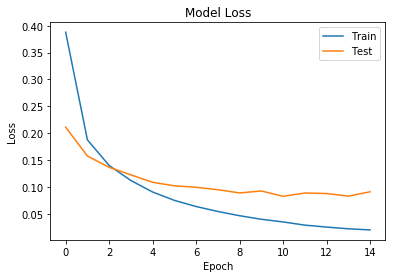

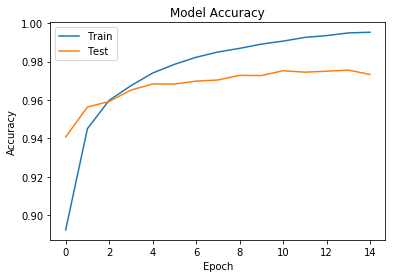

In [15]:
main_model_func()

ANN_seq_func
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 2s 33us/step - loss: 0.3893 - acc: 0.8926 - val_loss: 0.2082 - val_acc: 0.9439
Epoch 2/15
48000/48000 [==============================] - 1s 28us/step - loss: 0.1810 - acc: 0.9481 - val_loss: 0.1498 - val_acc: 0.9582
Epoch 3/15
48000/48000 [==============================] - 1s 28us/step - loss: 0.1330 - acc: 0.9617 - val_loss: 0.1334 - val_acc: 0.9619
Epoch 4/15
48000/48000 [==============================] - 1s

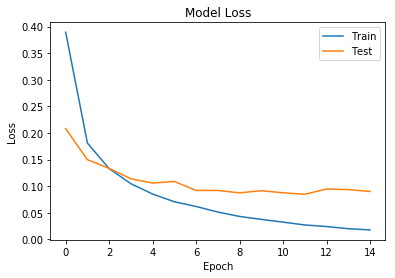

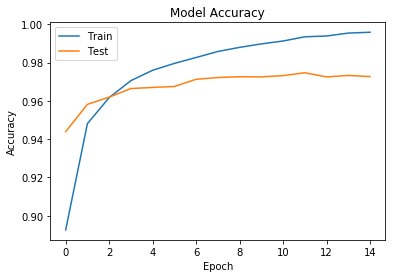

In [16]:
main_seq_func()

ANN_models_class
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0   

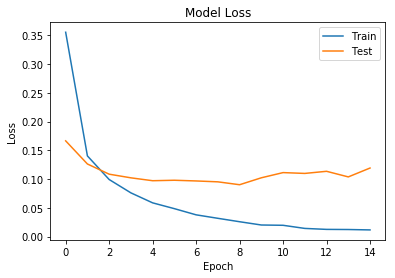

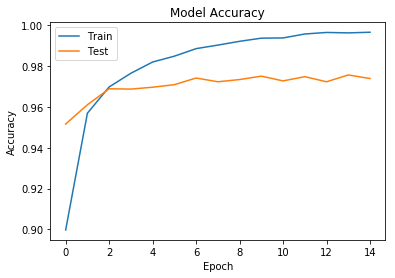

In [17]:
main_model_class()

ANN_seq_class
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 2s 38us/step - loss: 0.3997 - acc: 0.8885 - val_loss: 0.2186 - val_acc: 0.9388
Epoch 2/15
48000/48000 [==============================] - 1s 28us/step - loss: 0.1887 - acc: 0.9463 - val_loss: 0.1589 - val_acc: 0.9554
Epoch 3/15
48000/48000 [==============================] - 1s 29us/step - loss: 0.1372 - acc: 0.9613 - val_loss: 0.1327 - val_acc: 0.9630
Epoch 4/15
48000/48000 [==============================] - 1

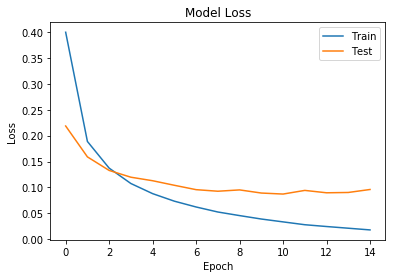

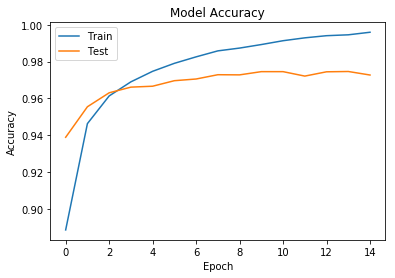

In [18]:
main_seq_class()